In [1]:
import itertools
from ipywidgets import interact, interact_manual
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style()

%load_ext watermark

## Load Data

In [2]:
FILE_NAME = './DataScientist/feature_grid_anonymized.csv'

In [3]:
df_sales = pd.read_csv(FILE_NAME)
df_sales.head()

,article_id,location_id,transaction_date,option_id,sales_price,original_price,promotion_discount,season_id,article_count,in_stock,country,category,sub_category_anonymized,brand
0,7754922710402,27650,2019-08-01,775492271,29.99,29.99,0.0,76,0.0,0.0,country_1,category_0,sub_category_0,brand_0
1,7754922710402,27875,2019-08-01,775492271,29.99,29.99,0.0,76,0.0,0.0,country_1,category_0,sub_category_0,brand_0
2,7754922710402,27650,2019-08-02,775492271,29.99,29.99,0.0,76,0.0,0.0,country_1,category_0,sub_category_0,brand_0
3,7754922710402,27875,2019-08-02,775492271,29.99,29.99,0.0,76,0.0,0.0,country_1,category_0,sub_category_0,brand_0
4,7754922710402,27650,2019-08-03,775492271,29.99,29.99,0.0,76,0.0,0.0,country_1,category_0,sub_category_0,brand_0


In [4]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328246 entries, 0 to 328245
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   article_id               328246 non-null  int64  
 1   location_id              328246 non-null  int64  
 2   transaction_date         328246 non-null  object 
 3   option_id                328246 non-null  int64  
 4   sales_price              328246 non-null  float64
 5   original_price           328246 non-null  float64
 6   promotion_discount       328246 non-null  float64
 7   season_id                328246 non-null  int64  
 8   article_count            328246 non-null  float64
 9   in_stock                 328246 non-null  float64
 10  country                  328246 non-null  object 
 11  category                 328246 non-null  object 
 12  sub_category_anonymized  328246 non-null  object 
 13  brand                    328246 non-null  object 
dtypes: f

In [5]:
df_sales['article_id'].nunique()

12

In [6]:
df_sales['location_id'].nunique()

168

In [7]:
df_sales['country'].nunique()

3

In [8]:
df_sales.groupby('country')['location_id'].count()

country
country_0      1220
country_1    288901
country_2     38125
Name: location_id, dtype: int64

In [9]:
df_sales[(df_sales.article_id == 7754922710402) & (df_sales.location_id == 27650)]

,article_id,location_id,transaction_date,option_id,sales_price,original_price,promotion_discount,season_id,article_count,in_stock,country,category,sub_category_anonymized,brand
0,7754922710402,27650,2019-08-01,775492271,29.99,29.99,0.0,76,0.0,0.0,country_1,category_0,sub_category_0,brand_0
2,7754922710402,27650,2019-08-02,775492271,29.99,29.99,0.0,76,0.0,0.0,country_1,category_0,sub_category_0,brand_0
4,7754922710402,27650,2019-08-03,775492271,29.99,29.99,0.0,76,0.0,0.0,country_1,category_0,sub_category_0,brand_0
6,7754922710402,27650,2019-08-04,775492271,29.99,29.99,0.0,76,0.0,0.0,country_1,category_0,sub_category_0,brand_0
8,7754922710402,27650,2019-08-05,775492271,29.99,29.99,0.0,76,0.0,0.0,country_1,category_0,sub_category_0,brand_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,7754922710402,27650,2020-05-27,775492271,19.99,29.99,0.0,76,0.0,0.0,country_1,category_0,sub_category_0,brand_0
602,7754922710402,27650,2020-05-28,775492271,19.99,29.99,0.0,76,0.0,0.0,country_1,category_0,sub_category_0,brand_0
604,7754922710402,27650,2020-05-29,775492271,19.99,29.99,0.0,76,0.0,0.0,country_1,category_0,sub_category_0,brand_0
606,7754922710402,27650,2020-05-30,775492271,19.99,29.99,0.0,76,0.0,0.0,country_1,category_0,sub_category_0,brand_0


### Promotion Discounts != Discounts

In [10]:
df_sales[df_sales.sales_price < df_sales.original_price].head()

,article_id,location_id,transaction_date,option_id,sales_price,original_price,promotion_discount,season_id,article_count,in_stock,country,category,sub_category_anonymized,brand
312,7754922710402,27650,2020-01-04,775492271,19.99,29.99,0.0,76,0.0,0.0,country_1,category_0,sub_category_0,brand_0
313,7754922710402,27875,2020-01-04,775492271,19.99,29.99,0.0,76,0.0,1.0,country_1,category_0,sub_category_0,brand_0
314,7754922710402,27650,2020-01-05,775492271,19.99,29.99,0.0,76,0.0,0.0,country_1,category_0,sub_category_0,brand_0
315,7754922710402,27875,2020-01-05,775492271,19.99,29.99,0.0,76,0.0,1.0,country_1,category_0,sub_category_0,brand_0
316,7754922710402,27650,2020-01-06,775492271,19.99,29.99,0.0,76,0.0,0.0,country_1,category_0,sub_category_0,brand_0


### in_stock

In [11]:
df_sales['in_stock'].describe()

count    328246.000000
mean          0.509807
std           0.856760
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          12.000000
Name: in_stock, dtype: float64

### article_id

In [12]:
df_sales[df_sales.article_id == 7754922710402]['article_count'].describe()

count    14751.000000
mean         0.005017
std          0.089302
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: article_count, dtype: float64

### article_count

In the absence of any clarification, I'm assuming that `article_count` refers to the number of articles sold on a daily basis. 

In [13]:
df_sales['article_count'].describe()

count    328246.000000
mean          0.005606
std           0.093697
min          -2.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: article_count, dtype: float64

This number can be negative due to customer returns. 

#### maximum daily sales in any store = 4

### category info

In [14]:
df_sales['category'].unique()

array(['category_0'], dtype=object)

In [15]:
df_sales['sub_category_anonymized'].unique()

array(['sub_category_0'], dtype=object)

In [16]:
df_sales['brand'].unique()

array(['brand_0'], dtype=object)

### season and option

In [17]:
df_sales['season_id'].unique()

array([76])

In [18]:
df_sales['option_id'].unique()

array([775492271, 775492246])

### Type Conversions

In [19]:
df_sales['transaction_date'] = pd.to_datetime(df_sales['transaction_date'])

<AxesSubplot:xlabel='transaction_date'>

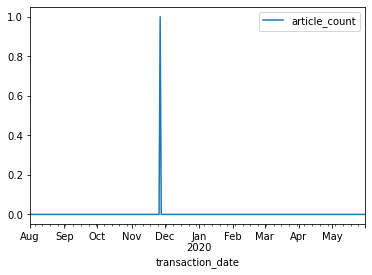

In [20]:
df_sales[(df_sales.article_id == 7754922710402) & (df_sales.location_id == 27650)].sort_values('transaction_date').plot(x='transaction_date', y='article_count')

## Grouping Data By Country

Since the number of daily sales per store is quite low, it makes sense to aggregate the total daily sales per article and per country. If it is nececssary to forecast demand per article per store per country, then one can use a basic forecaster such as using the previous weeks/days sales as next weeks/days forecast. In fact, the number of sales in the previous week is an important predictor as we shall see.

## The Problem 

From this point onwards, we assume that the problem is to predict weekly demand per article per country one week ahead of time. 

In [21]:
df_gr =  df_sales.groupby(['article_id', 'transaction_date', 'country'])['article_count'].sum().reset_index()

In [22]:
df_gr.head()

,article_id,transaction_date,country,article_count
0,7754922460402,2019-08-01,country_1,0.0
1,7754922460402,2019-08-01,country_2,0.0
2,7754922460402,2019-08-02,country_1,0.0
3,7754922460402,2019-08-02,country_2,0.0
4,7754922460402,2019-08-03,country_1,0.0


In [23]:
df_gr.article_id.unique()

array([7754922460402, 7754922460403, 7754922460404, 7754922460405,
       7754922460406, 7754922460407, 7754922710402, 7754922710403,
       7754922710404, 7754922710405, 7754922710406, 7754922710407])

<AxesSubplot:xlabel='transaction_date'>

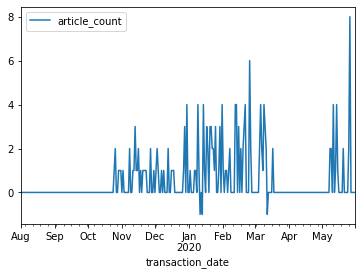

In [24]:
df_gr[(df_gr.article_id == 7754922710405) & (df_gr.country == 'country_1')].sort_values('transaction_date').plot(x='transaction_date', y='article_count')

In [25]:
import itertools


@interact
def create_country_sales_plots(country=list(df_gr.country.unique())):
    articles = df_gr.article_id.unique()
    nrows = 4
    ncols = 3
    nplots = itertools.product(range(nrows), range(ncols))

    fig, axs = plt.subplots(nrows, ncols, figsize=(10, 8))
    plt.subplots_adjust(left=1, bottom=0.5, right=3, top=4)


    for art, (r, c) in zip(articles, nplots):
        df_gr[(df_gr.article_id == art) & 
              (df_gr.country == country)].sort_values('transaction_date').plot(x='transaction_date', 
                                                                                   y='article_count', 
                                                                                   ax=axs[r, c])
        axs[r, c].set_title(f'Article: {art}, Country: {country}')

interactive(children=(Dropdown(description='country', options=('country_1', 'country_2', 'country_0'), value='…

## Intermediate Conclusion

The articles seem to be seasonal. Sales begin in October and end at around May of the following year. I would assume that these are clothing articles for a "Fall-Winter" collection. Very often such articles have to be sold off at a high discount towards the end of the season. I want to verify if this is indeed the case.  

## Create Joined Data Table

In [26]:
stock = df_sales.groupby(['article_id', 'country', 'transaction_date'])['in_stock'].sum().reset_index()['in_stock']

In [27]:
stock.describe()

count    8235.000000
mean       20.320826
std        32.189747
min         0.000000
25%         0.000000
50%         7.000000
75%        23.000000
max       191.000000
Name: in_stock, dtype: float64

In [28]:
df_gr['in_stock'] = stock

In [29]:
df_join = df_gr.merge(df_sales[['article_id', 
                                'transaction_date', 
                                'sales_price', 
                                'original_price', 
                                'country']].drop_duplicates(), 
                      how='inner', 
                      on=['article_id', 'transaction_date', 'country'])

In [30]:
df_join.head()

,article_id,transaction_date,country,article_count,in_stock,sales_price,original_price
0,7754922460402,2019-08-01,country_1,0.0,0.0,29.99,29.99
1,7754922460402,2019-08-01,country_2,0.0,0.0,29.99,29.99
2,7754922460402,2019-08-02,country_1,0.0,0.0,29.99,29.99
3,7754922460402,2019-08-02,country_2,0.0,0.0,29.99,29.99
4,7754922460402,2019-08-03,country_1,0.0,0.0,29.99,29.99


In [31]:
df_join['in_stock'].describe()

count    9465.000000
mean       18.795140
std        30.465385
min         0.000000
25%         0.000000
50%         7.000000
75%        19.000000
max       191.000000
Name: in_stock, dtype: float64

In [32]:
df_join['discount'] = (df_join['original_price'] - df_join['sales_price']) / df_join['original_price'] * 100

In [33]:
df_join.isna().any()

article_id          False
transaction_date    False
country             False
article_count       False
in_stock            False
sales_price         False
original_price      False
discount            False
dtype: bool

In [34]:
df_join.head()

,article_id,transaction_date,country,article_count,in_stock,sales_price,original_price,discount
0,7754922460402,2019-08-01,country_1,0.0,0.0,29.99,29.99,0.0
1,7754922460402,2019-08-01,country_2,0.0,0.0,29.99,29.99,0.0
2,7754922460402,2019-08-02,country_1,0.0,0.0,29.99,29.99,0.0
3,7754922460402,2019-08-02,country_2,0.0,0.0,29.99,29.99,0.0
4,7754922460402,2019-08-03,country_1,0.0,0.0,29.99,29.99,0.0


## Discounts Off-Season

In [35]:
articles = df_join.article_id.unique()
date = '2020-05-01'

for art in articles:
    disc = df_join[(df_join.article_id == art) & (df_join.transaction_date >= date)]['discount'].mean()
    print(f'Discount for article {art} from {date} onwards = {disc}')

Discount for article 7754922460402 from 2020-05-01 onwards = 22.229632099588756
Discount for article 7754922460403 from 2020-05-01 onwards = 16.67222407469157
Discount for article 7754922460404 from 2020-05-01 onwards = 16.67222407469157
Discount for article 7754922460405 from 2020-05-01 onwards = 22.229632099588756
Discount for article 7754922460406 from 2020-05-01 onwards = 22.229632099588756
Discount for article 7754922460407 from 2020-05-01 onwards = 22.229632099588756
Discount for article 7754922710402 from 2020-05-01 onwards = 22.229632099588756
Discount for article 7754922710403 from 2020-05-01 onwards = 22.229632099588756
Discount for article 7754922710404 from 2020-05-01 onwards = 16.67222407469157
Discount for article 7754922710405 from 2020-05-01 onwards = 22.229632099588756
Discount for article 7754922710406 from 2020-05-01 onwards = 33.34444814938314
Discount for article 7754922710407 from 2020-05-01 onwards = 33.34444814938314


## Discounts In-season

In [36]:
for art in articles:
    disc = df_join[(df_join.article_id == art) & (df_join.transaction_date < date)]['discount'].mean()
    print(f'Discount for article {art} from {date} onwards = {disc}')

Discount for article 7754922460402 from 2020-05-01 onwards = 12.143965684034598
Discount for article 7754922460403 from 2020-05-01 onwards = 8.535021435200022
Discount for article 7754922460404 from 2020-05-01 onwards = 8.535021435200022
Discount for article 7754922460405 from 2020-05-01 onwards = 12.143965684034598
Discount for article 7754922460406 from 2020-05-01 onwards = 12.143965684034598
Discount for article 7754922460407 from 2020-05-01 onwards = 12.143965684034598
Discount for article 7754922710402 from 2020-05-01 onwards = 12.530716183526145
Discount for article 7754922710403 from 2020-05-01 onwards = 12.530716183526145
Discount for article 7754922710404 from 2020-05-01 onwards = 8.724268030215544
Discount for article 7754922710405 from 2020-05-01 onwards = 12.530716183526145
Discount for article 7754922710406 from 2020-05-01 onwards = 14.360017816157697
Discount for article 7754922710407 from 2020-05-01 onwards = 14.360017816157697


## Intermediate Conclusion

As suspected, the off-season discount for these articles is around 2 times the in-season discount. I am proceeding with the assumption that these articles have a short winter sales season and must be sold off to make space for the "Spring-Summer" collection.

## Save Grouped Data

In [37]:
df_join.to_csv('sales_data_cleaned.csv', index=False)

## Preliminary Plots

In [38]:
import itertools


def generate_plots(x: str, y: str = 'Sales'):
    nrows = 2
    ncols = 2
    nplots = itertools.product(range(nrows), range(ncols))

    fig, axs = plt.subplots(nrows, ncols, figsize=(10, 8))
    plt.subplots_adjust(left=1, bottom=1, right=3, top=3)

    for idx, (i, j) in enumerate(nplots):
        store = idx + 1
        df_sales[df_sales['Store'] == store].sort_values('Date').plot(x=x, y=y, ax=axs[i, j])
        axs[i, j].set_title(f'Store {store}')

In [39]:
%watermark --iversions

numpy     : 1.20.2
seaborn   : 0.11.1
pandas    : 1.2.4
matplotlib: 3.4.1

